# Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019

######  https://data.qld.gov.au/dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Coastal Data System - Waves (Mooloolaba) 01-2017 to 06 - 2019.csv")
df.shape

(43728, 7)

### Exploring the Dataset

In [3]:
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43728 entries, 0 to 43727
Data columns (total 7 columns):
Date/Time         43728 non-null object
Hs                43728 non-null float64
Hmax              43728 non-null float64
Tz                43728 non-null float64
Tp                43728 non-null float64
Peak Direction    43728 non-null float64
SST               43728 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
count,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000,43728.000000
mean,1.041140,1.891779,5.412332,8.794887,97.395310,23.207409
std,4.485922,4.580826,4.739317,5.358859,28.782966,9.813377
min,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,0.838000,1.410000,4.974000,7.286000,85.000000,21.900000
50%,1.129000,1.900000,5.525000,8.881000,99.000000,23.950000
75%,1.542000,2.600000,6.162000,10.663250,116.000000,26.050000
max,4.257000,7.906000,10.921000,21.121000,358.000000,28.650000


In [6]:
df.columns

Index(['Date/Time', 'Hs', 'Hmax', 'Tz', 'Tp', 'Peak Direction', 'SST'], dtype='object')

In [7]:
df.rename(columns={"Peak Direction" : "Direction"}, inplace = True)

it seems that value "-99.9" is irrelevant that doesn't help to provide relevant information.
We will hence omit that data

In [8]:
df[df["SST"] == -99.9].head()

,Date/Time,Hs,Hmax,Tz,Tp,Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.9
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.9
1554,02/02/2017 09:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.9
1733,02/06/2017 02:30,1.162,2.30,5.231,7.655,-99.9,-99.9
1796,02/07/2017 10:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.9


In [24]:
#sns.pairplot(df)

In [147]:
df_new = df[df['Direction'] != -99.9]

In [148]:
df_new.shape

(43457, 7)

In [149]:
df_new.head()

,Date/Time,Hs,Hmax,Tz,Tp,Direction,SST
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45
5,01/01/2017 02:30,0.718,1.61,4.614,6.181,68.0,25.45
6,01/01/2017 03:00,0.707,1.34,4.568,4.705,73.0,25.50


In [150]:
df_new.reset_index(inplace = True)

In [151]:
df_new.drop(["index"], axis=1, inplace=True)

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
#sns.pairplot(df1)

the pariplot shows us that the columns are uncorrelated to each other

In [111]:
df_new.drop("Date/Time", axis = 1, inplace = True)

In [113]:
df_new.head(2)

,Hs,Hmax,Tz,Tp,Direction,SST
0,0.763,1.15,4.520,5.513,49.0,25.65
1,0.770,1.41,4.582,5.647,75.0,25.50


##### This section below is for prediction on column "Direction". 
##### Scroll down to see other vision.
##### This gave us only 0.22 accuracy

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
"""
df1[:, 'Hs'] = scaler.fit_transform(df1[:, 'Hs'])
df1['Hmax'] = scaler.fit_transform(df1['Hmax'])
df1['Tz'] = scaler.fit_transform(df1['Tz'])
df1['Tp'] = scaler.fit_transform(df1['Tp'])
df1['SST'] = scaler.fit_transform(df1['SST'])
"""

"\ndf1[:, 'Hs'] = scaler.fit_transform(df1[:, 'Hs'])\ndf1['Hmax'] = scaler.fit_transform(df1['Hmax'])\ndf1['Tz'] = scaler.fit_transform(df1['Tz'])\ndf1['Tp'] = scaler.fit_transform(df1['Tp'])\ndf1['SST'] = scaler.fit_transform(df1['SST'])\n"

In [115]:
df_direction = df_new['Direction']

In [116]:
df_direction.head(2)

0    49.0
1    75.0
Name: Direction, dtype: float64

In [120]:
df_new.drop('Direction', axis = 1, inplace = True)

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [121]:
df_scale = scaler.fit_transform(df_new)

In [122]:
df_scale

array([[-0.47124844, -0.7559064 , -0.85545245, -1.36621743,  0.76220616],
       [-0.46419709, -0.54527632, -0.80690059, -1.31378278,  0.69497297],
       [-0.48736581, -0.74780524, -0.85936792, -1.5344779 ,  0.6725619 ],
       ...,
       [ 0.93297754,  1.09115739,  2.78437038,  1.52042776, -0.89621253],
       [ 0.86246404,  0.61318913,  2.42258076,  0.7663861 , -0.89621253],
       [ 0.70028299,  0.72660533,  2.26831116,  1.2613849 , -0.89621253]])

In [123]:
df_frame_scaled = pd.DataFrame(df_scale, columns= ["Hs", "Hmax", "Tz", "Tp", "SST"])

In [124]:
df_frame_scaled.head()

,Hs,Hmax,Tz,Tp,SST
0,-0.471248,-0.755906,-0.855452,-1.366217,0.762206
1,-0.464197,-0.545276,-0.806901,-1.313783,0.694973
2,-0.487366,-0.747805,-0.859368,-1.534478,0.672562
3,-0.516579,-0.383253,-0.781842,-1.104827,0.672562
4,-0.527659,-0.601984,-0.817864,-1.682391,0.694973


In [125]:
df_final = pd.concat([df_frame_scaled, df_direction.reindex(df_frame_scaled.index)], axis = 1)

In [126]:
df_final.head(10)

,Hs,Hmax,Tz,Tp,SST,Direction
0,-0.471248,-0.755906,-0.855452,-1.366217,0.762206,49.0
1,-0.464197,-0.545276,-0.806901,-1.313783,0.694973,75.0
2,-0.487366,-0.747805,-0.859368,-1.534478,0.672562,91.0
3,-0.516579,-0.383253,-0.781842,-1.104827,0.672562,68.0
4,-0.527659,-0.601984,-0.817864,-1.682391,0.694973,73.0
5,-0.505498,-0.707299,-0.647149,-1.768869,0.694973,63.0
6,-0.501469,-0.715401,-0.560226,-1.550521,0.694973,68.0
7,-0.523630,-0.642490,-0.464688,-0.221264,0.694973,66.0
8,-0.536725,-0.788311,-0.583719,-1.729738,0.717384,64.0
9,-0.548813,-0.764008,-0.671425,-1.484391,0.717384,56.0


In [128]:
df_final.shape

(43457, 6)

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop("Direction", axis = 1), df_final["Direction"],test_size = 0.25, random_state = 40)

In [136]:
model.fit(X_train, y_train)
predict = model.predict(X_test)

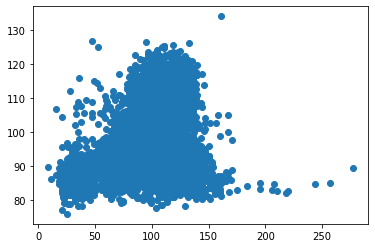

In [138]:
plt.scatter(y_test, predict)
plt.show()

In [141]:
print("metrics.mean_absolute_error : ", metrics.mean_absolute_error(y_test, predict))
print("metrics.mean_squared_error : ", metrics.mean_squared_error(y_test, predict))
print("np.sqrt(metrics.mean_squared_error : ", np.sqrt(metrics.mean_squared_error(y_test, predict)))
print("metrics.r2_score : ", metrics.r2_score(y_test, predict))

metrics.mean_absolute_error :  16.97785155665341
metrics.mean_squared_error :  517.0802690454748
np.sqrt(metrics.mean_squared_error :  22.73939904758863
metrics.r2_score :  0.1283316520376907


In [143]:
import statsmodels.formula.api as smf


In [145]:
est = smf.ols("Direction ~ Hs + Hmax + Tz + Tp + SST", df_final).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Direction   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     1293.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:15:50   Log-Likelihood:            -1.9725e+05
No. Observations:               43457   AIC:                         3.945e+05
Df Residuals:                   43451   BIC:                         3.946e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.6257      0.109    907.671      0.000      98.413      98.839
Hs            -6.0920      0.426    -14.302      0.000      -6.927      -5.257
Hmax           4.6423      0.391     11.869      0.000       3.876       5.409
Tz            -1.1015      0.194     -5.684      0.000      -1.481      -0.722
Tp             8.8869      0.139     64.152      0.000       8.615       9.158
SST           -2.5698      0.113    -22.726      0.000      -2.791      -2.348
==============================================================================
Omnibus:                     2905.295   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14526.480
Skew:                          -0.035   Prob(JB):                         0.00
Kurtosis:                       5.832   Cond. No.                         8.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### This section below is for prediction on column "Hmax". 
##### Scroll down to see other approach.

In [155]:
df_new.head(2)

,Hmax,Tz,Tp,Direction,SST
0,1.15,4.520,5.513,49.0,25.65
1,1.41,4.582,5.647,75.0,25.50


In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [154]:
df_new.drop(['Date/Time', 'Hs'], axis = 1, inplace = True)

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [156]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
model = DecisionTreeRegressor()

#### Taking "T" as target column


In [167]:
x = df_new.drop(["Hmax"], axis = 1).values
y = df_new["Hmax"].values

In [169]:
x[:, :] = scaler.fit_transform(x[:, :])

In [173]:
x = pd.DataFrame(x, columns = ["Tz", "Tp", "Direction", "SST"])

In [175]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [176]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [177]:
predict = model.predict(xtest)

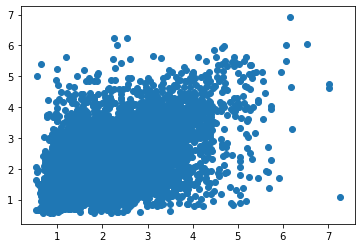

In [178]:
plt.scatter(ytest, predict)
plt.show()

In [179]:
print("metrics.mean_absolute_error : ", metrics.mean_absolute_error(ytest, predict))
print("metrics.mean_squared_error : ", metrics.mean_squared_error(ytest, predict))
print("np.sqrt(metrics.mean_squared_error : ", np.sqrt(metrics.mean_squared_error(ytest, predict)))
print("metrics.r2_score : ", metrics.r2_score(ytest, predict))

metrics.mean_absolute_error :  0.5769118729866543
metrics.mean_squared_error :  0.6825239012885413
np.sqrt(metrics.mean_squared_error :  0.8261500476841609
metrics.r2_score :  0.14500443101933658


In [180]:
import statsmodels.formula.api as smf


In [61]:
est = smf.ols("T ~ CO_GT + NMHC_GT + C6H6_GT + NOx_GT + NO2_GT + RH + AH", df_new_frame).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      T   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.490e+04
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:50:04   Log-Likelihood:                -1363.9
No. Observations:                8991   AIC:                             2744.
Df Residuals:                    8983   BIC:                             2801.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.102e-16      0.003   2.73e-13      1.000      -0.006       0.006
CO_GT          0.0054      0.004      1.317      0.188      -0.003       0.013
NMHC_GT        0.0046      0.003      1.405      0.160      -0.002       0.011
C6H6_GT        0.0528      0.005     11.403      0.000       0.044       0.062
NOx_GT        -0.0638      0.008     -8.095      0.000      -0.079      -0.048
NO2_GT         0.0337      0.007      4.910      0.000       0.020       0.047
RH            -0.6930      0.003   -199.170      0.000      -0.700      -0.686
AH             0.7608      0.003    219.187      0.000       0.754       0.768
==============================================================================
Omnibus:                      627.884   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1773.056
Skew:                           0.377   Prob(JB):                         0.00
Kurtosis:                       5.041   Cond. No.                         5.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Quiet hard to understand, what shall be the column